# **Vinted homework**

This is homework assignment

In [20]:
#import libraries

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from utils_new import *

In [21]:
# Set default plotting parameters
plt.rcParams['figure.figsize'] = [20.0, 7.0]
plt.rcParams.update({'font.size': 22})

sns.set_palette('colorblind')
sns.set_style('white')
sns.set_context('talk')


Read the data. Also check:
How much data do I have? 
Data example

In [25]:
# import data
sales_df = pd.read_csv("SalesForCourse_quizz_table.csv")

print(sales_df.shape) # print shape

sales_df.head() # data example



(34867, 16)


,index,Date,Year,Month,Customer Age,Customer Gender,Country,State,Product Category,Sub Category,Quantity,Unit Cost,Unit Price,Cost,Revenue,Column1
0,0,02/19/16,2016.0,February,29.0,F,United States,Washington,Accessories,Tires and Tubes,1.0,80.00,109.000000,80.0,109.0,NaN
1,1,02/20/16,2016.0,February,29.0,F,United States,Washington,Clothing,Gloves,2.0,24.50,28.500000,49.0,57.0,NaN
2,2,02/27/16,2016.0,February,29.0,F,United States,Washington,Accessories,Tires and Tubes,3.0,3.67,5.000000,11.0,15.0,NaN
3,3,03/12/16,2016.0,March,29.0,F,United States,Washington,Accessories,Tires and Tubes,2.0,87.50,116.500000,175.0,233.0,NaN
4,4,03/12/16,2016.0,March,29.0,F,United States,Washington,Accessories,Tires and Tubes,3.0,35.00,41.666667,105.0,125.0,NaN


In [4]:
# check number of unique values in the dataset
for i in list(sales_df.columns):
    print(f'Unique {i}: {sales_df[i].nunique()}')

Unique index: 34867
Unique Date: 576
Unique Year: 2
Unique Month: 12
Unique Customer Age: 70
Unique Customer Gender: 2
Unique Country: 4
Unique State: 45
Unique Product Category: 3
Unique Sub Category: 17
Unique Quantity: 3
Unique Unit Cost: 882
Unique Unit Price: 5175
Unique Cost: 417
Unique Revenue: 3023
Unique Column1: 1281


In [5]:
# checking for null values
sales_df.isnull().sum()

index 0
Date 1
Year 1
Month 1
Customer Age 1
Customer Gender 1
Country 1
State 1
Product Category 1
Sub Category 1
Quantity 1
Unit Cost 1
Unit Price 1
Cost 1
Revenue 0
Column1 32293
dtype: int64

In [6]:
# statistics about numerical data
sales_df.describe()

get_num_people_by_age_category(sales_df)

,index,Date,Year,Month,Customer Age,Customer Gender,Country,State,Product Category,Sub Category,Quantity,Unit Cost,Unit Price,Cost,Revenue,Column1,age_group
0,0,02/19/16,2016.0,February,29.0,F,United States,Washington,Accessories,Tires and Tubes,1.0,80.00,109.000000,80.0,109.000000,NaN,young
1,1,02/20/16,2016.0,February,29.0,F,United States,Washington,Clothing,Gloves,2.0,24.50,28.500000,49.0,57.000000,NaN,young
2,2,02/27/16,2016.0,February,29.0,F,United States,Washington,Accessories,Tires and Tubes,3.0,3.67,5.000000,11.0,15.000000,NaN,young
3,3,03/12/16,2016.0,March,29.0,F,United States,Washington,Accessories,Tires and Tubes,2.0,87.50,116.500000,175.0,233.000000,NaN,young
4,4,03/12/16,2016.0,March,29.0,F,United States,Washington,Accessories,Tires and Tubes,3.0,35.00,41.666667,105.0,125.000000,NaN,young
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34862,34862,02/07/16,2016.0,February,38.0,M,France,Hauts de Seine,Bikes,Mountain Bikes,2.0,1160.00,985.500000,2320.0,1971.000000,NaN,middle_aged
34863,34863,03/13/15,2015.0,March,38.0,M,France,Hauts de Seine,Bikes,Mountain Bikes,1.0,2049.00,1583.000000,2049.0,1583.000000,NaN,middle_aged
34864,34864,04/05/15,2015.0,April,38.0,M,France,Hauts de Seine,Bikes,Mountain Bikes,3.0,683.00,560.666667,2049.0,1682.000000,NaN,middle_aged
34865,34865,08/30/15,2015.0,August,38.0,M,France,Hauts de Seine,Bikes,Mountain Bikes,1.0,2320.00,1568.000000,2320.0,1568.000000,NaN,middle_aged


In [7]:
# checking column types
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34867 entries, 0 to 34866
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   index             34867 non-null  int64   
 1   Date              34866 non-null  object  
 2   Year              34866 non-null  float64 
 3   Month             34866 non-null  object  
 4   Customer Age      34866 non-null  float64 
 5   Customer Gender   34866 non-null  object  
 6   Country           34866 non-null  object  
 7   State             34866 non-null  object  
 8   Product Category  34866 non-null  object  
 9   Sub Category      34866 non-null  object  
 10  Quantity          34866 non-null  float64 
 11  Unit Cost         34866 non-null  float64 
 12  Unit Price        34866 non-null  float64 
 13  Cost              34866 non-null  float64 
 14  Revenue           34867 non-null  float64 
 15  Column1           2574 non-null   float64 
 16  age_group         3486

In [8]:
# convert Date to datetime

sales_df['Date'] = pd.to_datetime(sales_df['Date'])

# and check that it worked

sales_df[['Date']].info()

# check date range of dataset
print(f"Min Date: {sales_df['Date'].min()}")
print(f"Max Date: {sales_df['Date'].max()}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34867 entries, 0 to 34866
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    34866 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 272.5 KB
Min Date: 2015-01-01 00:00:00
Max Date: 2016-07-31 00:00:00


In [9]:
# https://stackoverflow.com/questions/43214978/seaborn-barplot-displaying-values
# function to show values on bars
def show_values_on_bars(axs):
    def _show_on_single_plot(ax):        
        for p in ax.patches:
            _x = p.get_x() + p.get_width() / 2
            _y = p.get_y() + p.get_height()
            value = '{:.0f}'.format(p.get_height())
            ax.text(_x, _y, value, ha="center") 

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)

Investigate sales by countries

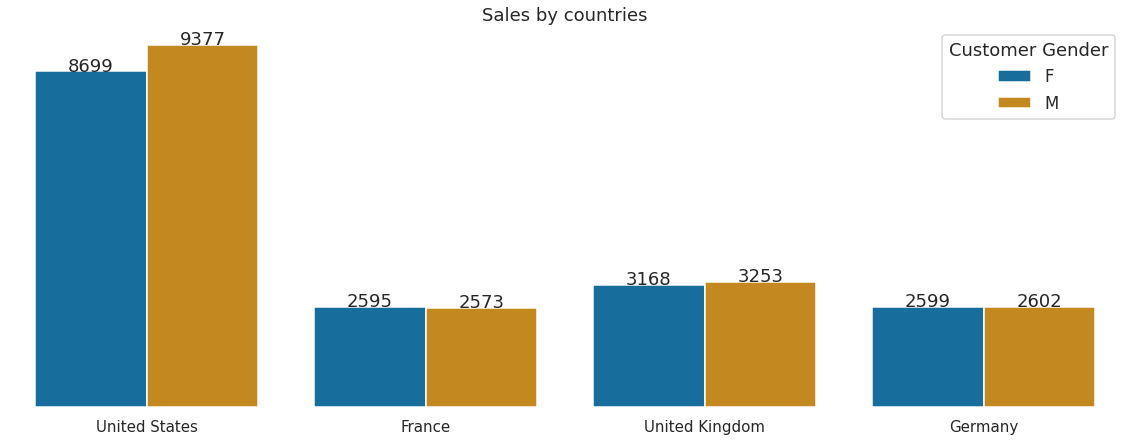

In [10]:

#visualize status feature
fig, ax = plt.subplots()
#g = sns.countplot(x=sales_df['Country'], order = sales_df['Country'].value_counts().index, hue='Quantity',palette='colorblind')
g = sns.countplot(data=sales_df, x="Country", hue="Customer Gender")
g.set_yticklabels([])

# show values on the bars to make the chart more readable and cleaner 
show_values_on_bars(ax)


plt.title('Sales by countries')
sns.despine(left=True, bottom=True)
plt.xlabel('')
plt.ylabel('')
plt.tick_params(axis='x', which='major', labelsize=15)
plt.show()

In [11]:
#
# Function: Copy-pasted from question and modified
def get_num_people_by_age_category(df):
    df["age_group"] = pd.cut(x=df['Customer Age'], bins=[0,20,40,60,100], labels=["0-20","20-40","40-60","60+"])
    return df

sales_df = get_num_people_by_age_category(sales_df)

sales_df.head()

,index,Date,Year,Month,Customer Age,Customer Gender,Country,State,Product Category,Sub Category,Quantity,Unit Cost,Unit Price,Cost,Revenue,Column1,age_group
0,0,2016-02-19,2016.0,February,29.0,F,United States,Washington,Accessories,Tires and Tubes,1.0,80.00,109.000000,80.0,109.0,NaN,20-40
1,1,2016-02-20,2016.0,February,29.0,F,United States,Washington,Clothing,Gloves,2.0,24.50,28.500000,49.0,57.0,NaN,20-40
2,2,2016-02-27,2016.0,February,29.0,F,United States,Washington,Accessories,Tires and Tubes,3.0,3.67,5.000000,11.0,15.0,NaN,20-40
3,3,2016-03-12,2016.0,March,29.0,F,United States,Washington,Accessories,Tires and Tubes,2.0,87.50,116.500000,175.0,233.0,NaN,20-40
4,4,2016-03-12,2016.0,March,29.0,F,United States,Washington,Accessories,Tires and Tubes,3.0,35.00,41.666667,105.0,125.0,NaN,20-40


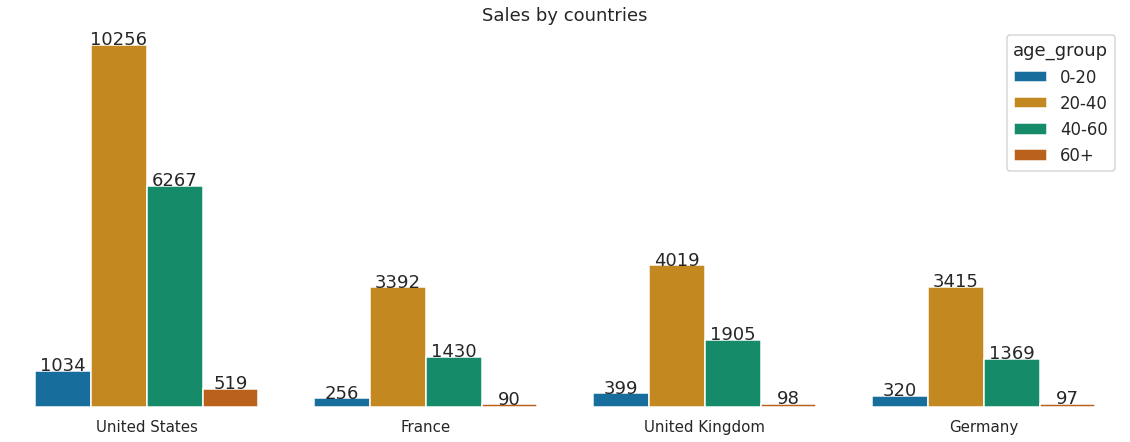

In [12]:

#visualize status feature
fig, ax = plt.subplots()
#g = sns.countplot(x=sales_df['Country'], order = sales_df['Country'].value_counts().index, hue='Quantity',palette='colorblind')
g = sns.countplot(data=sales_df, x="Country", hue="age_group")
g.set_yticklabels([])

# show values on the bars to make the chart more readable and cleaner 
show_values_on_bars(ax)


plt.title('Sales by countries')
sns.despine(left=True, bottom=True)
plt.xlabel('')
plt.ylabel('')
plt.tick_params(axis='x', which='major', labelsize=15)
plt.show()

  Customer Gender  total_quantity
0               F      10932634.0
1               M      11411942.0


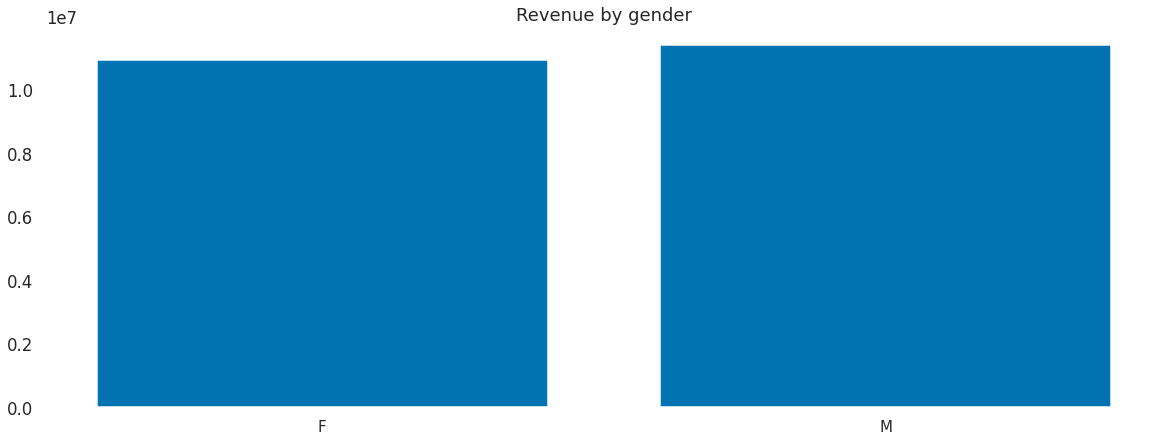

In [13]:
# plot total revenue from females and males


temp_df = sales_df.groupby('Customer Gender',as_index=False).agg (total_quantity = ('Revenue' , 'sum'))

print(temp_df)

plt.bar(temp_df['Customer Gender'],temp_df['total_quantity'])

g.set_yticklabels([])

# show values on the bars to make the chart more readable and cleaner 
show_values_on_bars(ax)


plt.title('Revenue by gender')
sns.despine(left=True, bottom=True)
plt.xlabel('')
plt.ylabel('')
plt.tick_params(axis='x', which='major', labelsize=15)
plt.show()

  age_group  total_quantity
0      0-20        912820.0
1     20-40      13810339.0
2     40-60       7186919.0
3       60+        434498.0


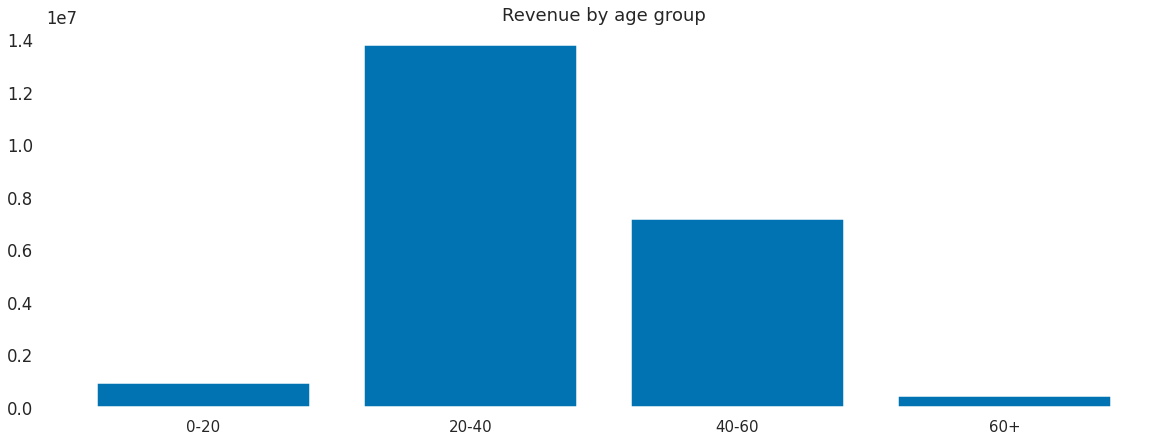

In [14]:
# plot total revenue from different age groups


temp_df = sales_df.groupby('age_group',as_index=False).agg (total_quantity = ('Revenue' , 'sum'))

print(temp_df)

plt.bar(temp_df['age_group'],temp_df['total_quantity'])

g.set_yticklabels([])

# show values on the bars to make the chart more readable and cleaner 
show_values_on_bars(ax)


plt.title('Revenue by age group')
sns.despine(left=True, bottom=True)
plt.xlabel('')
plt.ylabel('')
plt.tick_params(axis='x', which='major', labelsize=15)
plt.show()

20-40    21082
40-60    10971
0-20      2009
60+        804
Name: age_group, dtype: int64
  age_group  total_quantity
0      0-20        912820.0
1     20-40      13810339.0
2     40-60       7186919.0
3       60+        434498.0


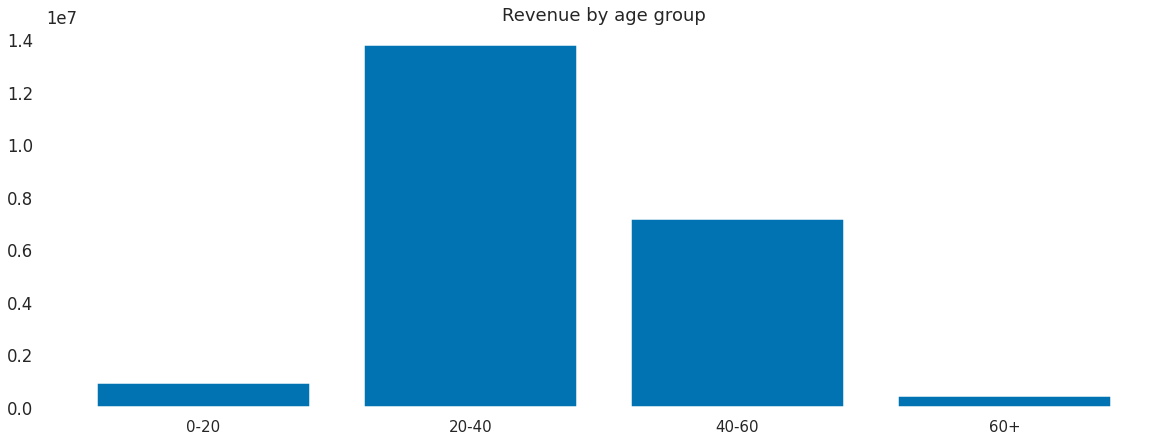

In [15]:
# revenue from one individual different categories
counts = sales_df['age_group'].value_counts()
print(counts)

temp_df = sales_df.groupby('age_group',as_index=False).agg (total_quantity = ('Revenue' , 'sum')) # sum, count, mean



print(temp_df)

plt.bar(temp_df['age_group'],temp_df['total_quantity'])

g.set_yticklabels([])

# show values on the bars to make the chart more readable and cleaner 
show_values_on_bars(ax)


plt.title('Revenue by age group')
sns.despine(left=True, bottom=True)
plt.xlabel('')
plt.ylabel('')
plt.tick_params(axis='x', which='major', labelsize=15)
plt.show()

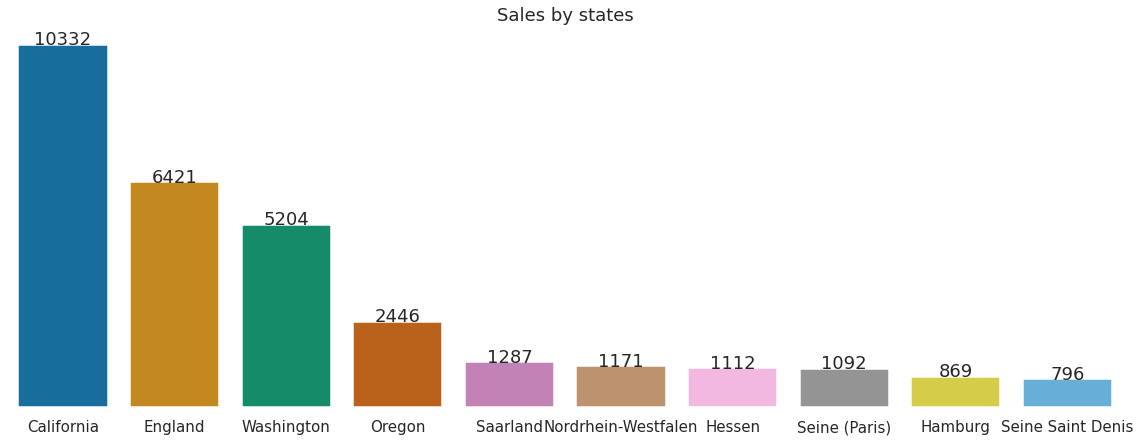

In [16]:
# sales by states, only 10 maximum
#visualize status feature
fig, ax = plt.subplots()
g = sns.countplot(x=sales_df['State'], order = sales_df['State'].value_counts().iloc[:10].index, palette='colorblind')
g.set_yticklabels([])

# show values on the bars to make the chart more readable and cleaner 
show_values_on_bars(ax)


plt.title('Sales by states')
sns.despine(left=True, bottom=True)
plt.xlabel('')
plt.ylabel('')
plt.tick_params(axis='x', which='major', labelsize=15)
plt.show()

Plot quantity sold versus date (grouped by months)

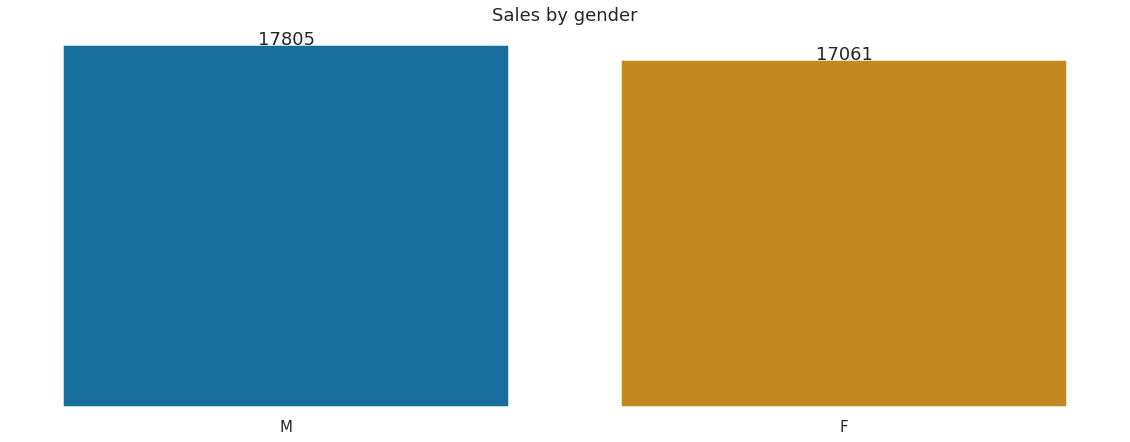

In [17]:
# sales by gender, only 10 maximum
#visualize status feature
fig, ax = plt.subplots()
g = sns.countplot(x=sales_df['Customer Gender'], order = sales_df['Customer Gender'].value_counts().index, palette='colorblind')
g.set_yticklabels([])

# show values on the bars to make the chart more readable and cleaner 
show_values_on_bars(ax)


plt.title('Sales by gender')
sns.despine(left=True, bottom=True)
plt.xlabel('')
plt.ylabel('')
plt.tick_params(axis='x', which='major', labelsize=15)
plt.show()

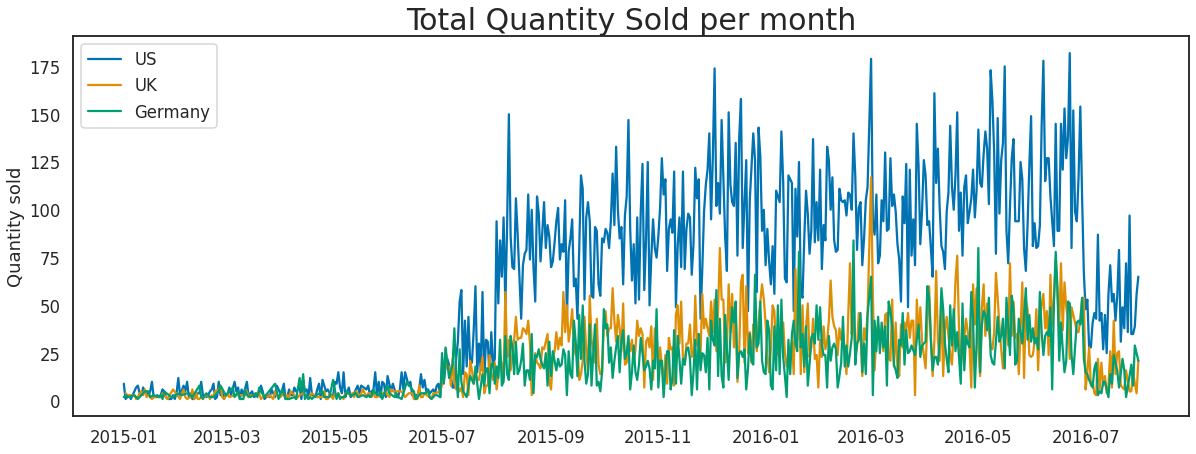

In [18]:
## add quantity the same month

# US data

sales_df = sales_df.sort_values('Date')

us_data_frame = sales_df[sales_df["Country"] == 'United States']

us_data_frame['DateYearMonth'] = pd.to_datetime(us_data_frame['Date'],format='%Y-%m')


# print(sales_df.head())

df = us_data_frame.groupby(['DateYearMonth'],as_index=False).agg (total_quantity = ('Quantity' , 'sum'))

#print(df)

plt.plot(df['DateYearMonth'],df['total_quantity'])


# UK data


uk_data_frame = sales_df[sales_df["Country"] == 'United Kingdom']

uk_data_frame['DateYearMonth'] = pd.to_datetime(uk_data_frame['Date'],format='%Y-%m')


# print(sales_df.head())

df = uk_data_frame.groupby(['DateYearMonth'],as_index=False).agg (total_quantity = ('Quantity' , 'sum'))

#print(df)

plt.plot(df['DateYearMonth'],df['total_quantity'])

# Germany data


ger_data_frame = sales_df[sales_df["Country"] == 'Germany']

ger_data_frame['DateYearMonth'] = pd.to_datetime(ger_data_frame['Date'],format='%Y-%m')


# print(sales_df.head())

df = ger_data_frame.groupby(['DateYearMonth'],as_index=False).agg (total_quantity = ('Quantity' , 'sum'))

#print(df)

plt.plot(df['DateYearMonth'],df['total_quantity'])


plt.xlabel('')
plt.ylabel('Quantity sold')
plt.title('Total Quantity Sold per month', fontsize=30)
plt.legend(['US','UK','Germany'])

plt.show()





In [19]:
## add quantity the same month

# total sales

sales_df = sales_df.sort_values('Date')


sales_df['DateYearMonth'] = pd.to_datetime(sales_df['Date'],format='%Y-%m')

#sales_df['Month_Year'] = sales_df['Date'].dt.to_period('M')
#sales_df['Month_Year'] = pd.to_datetime(sales_df['Date']).dt.strftime('%Y-%m')

#sales_df["Month_Year"] = pd.to_datetime(sales_df["Month_Year"])
#sales_df["Month_Year"] = sales_df["Month_Year"].to_timestamp()


df = sales_df.groupby(['Month_Year'],as_index=False).agg (total_quantity = ('Quantity' , 'sum'))

#print(df)#.iloc[0:20,0])

# print(sales_df[['Month_Year']].info())
# print(sales_df[['DateYearMonth']].info())

plt.bar(df['Month_Year'],df['total_quantity'])

# n = 5  # Keeps every 2th label
# [l.set_visible(False) for (i,l) in enumerate(ax.xaxis.get_ticklabels()) if i % n != 0]


plt.xticks( rotation=90)

plt.show()

KeyError: KeyError: 'Month_Year'

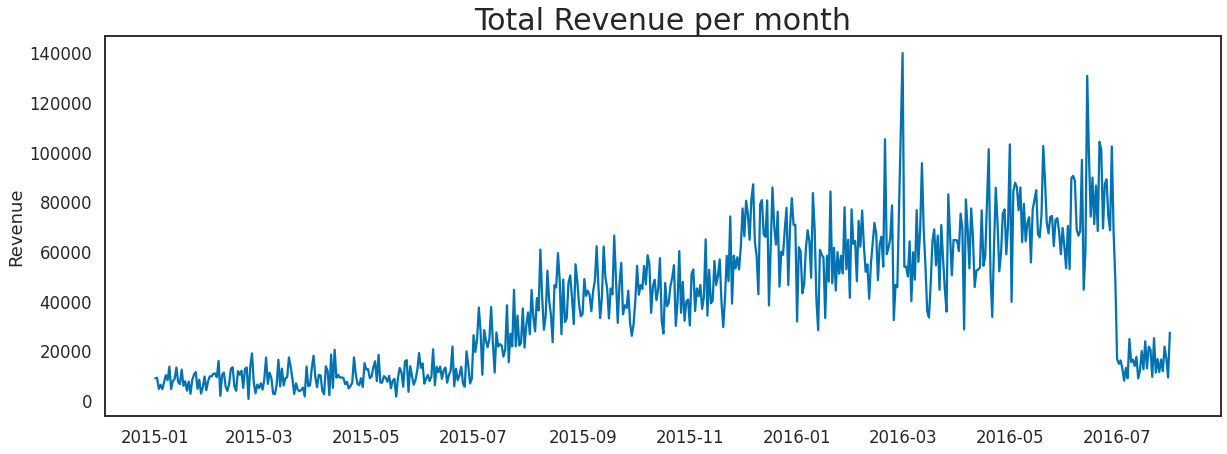

In [131]:
## add quantity the same month



# print(sales_df.head())

df = sales_df.groupby(['DateYearMonth'],as_index=False).agg (total_revenue = ('Revenue' , 'sum'))

#print(df)

plt.plot(df['DateYearMonth'],df['total_revenue'])


plt.xlabel('')
plt.ylabel('Revenue')
plt.title('Total Revenue per month', fontsize=30)

plt.show()